In [22]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import dataclasses
from sklearn.preprocessing import LabelEncoder

In [3]:
loan_dataset = pd.read_csv('loan_approval_dataset.csv')

In [4]:
loan_dataset.shape

(4269, 13)

In [5]:
loan_dataset.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [6]:
loan_dataset.drop_duplicates(inplace=True)

In [217]:
loan_dataset.columns = loan_dataset.columns.str.replace(' ', '')

In [7]:
loan_dataset.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [8]:
loan_dataset.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
loan_dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [18]:
print(loan_dataset['education'].value_counts())
print(loan_dataset['self_employed'].value_counts())
print(loan_dataset['loan_status'].value_counts())

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
self_employed
Yes    2150
No     2119
Name: count, dtype: int64
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


In [20]:
feature_mean = loan_dataset.mean(numeric_only=True)
feature_std = loan_dataset.std(numeric_only=True)
numeric_feature = loan_dataset.select_dtypes('number').columns
normalized_dataset = (loan_dataset[numeric_feature] - feature_mean) / feature_std

normalized_dataset.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,-1.731442,-0.294067,1.617790,1.632860,0.192594,1.032671,-0.779966,2.876952,0.831931,0.930195
1,-1.730631,-1.473375,-0.341710,-0.324376,-0.508031,-1.060927,-0.733838,-0.631847,-0.694912,-0.515876
2,-1.729820,0.295587,1.439653,1.610745,1.593844,-0.544777,-0.057294,-0.107806,1.996286,2.407034
3,-1.729008,0.295587,1.119008,1.721323,-0.508031,-0.770955,1.649444,-0.381219,0.897838,0.899428
4,-1.728197,1.474894,1.689044,1.002564,1.593844,-1.263907,0.757635,0.735218,1.567891,0.007171


In [26]:
label_encoder = LabelEncoder()

loan_dataset['education'] = label_encoder.fit_transform(loan_dataset['education'])
loan_dataset['self_employed'] = label_encoder.fit_transform(loan_dataset['self_employed'])
loan_dataset['loan_status'] = label_encoder.fit_transform(loan_dataset['loan_status'])

In [30]:
normalized_dataset['education'] = loan_dataset['education']
normalized_dataset['self_employed'] = loan_dataset['self_employed']
normalized_dataset['loan_status'] = loan_dataset['loan_status']

In [32]:
normalized_dataset.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status
0,-1.731442,-0.294067,1.617790,1.632860,0.192594,1.032671,-0.779966,2.876952,0.831931,0.930195,0,0,0
1,-1.730631,-1.473375,-0.341710,-0.324376,-0.508031,-1.060927,-0.733838,-0.631847,-0.694912,-0.515876,1,1,1
2,-1.729820,0.295587,1.439653,1.610745,1.593844,-0.544777,-0.057294,-0.107806,1.996286,2.407034,0,0,1
3,-1.729008,0.295587,1.119008,1.721323,-0.508031,-0.770955,1.649444,-0.381219,0.897838,0.899428,0,0,1
4,-1.728197,1.474894,1.689044,1.002564,1.593844,-1.263907,0.757635,0.735218,1.567891,0.007171,1,1,1


In [54]:
keras.utils.set_random_seed(42)

In [56]:
number_sample = len(normalized_dataset)
index_80 = round(number_sample * 0.8)
index_90 = index_80 + round(number_sample * 0.1)

In [58]:
shuffled_data = normalized_dataset.sample(frac=1, random_state=100)
train_data = shuffled_data.iloc[0:index_80]
validation_data = shuffled_data.iloc[index_80:index_90]
test_data = shuffled_data.iloc[index_90:]

In [60]:
train_data.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education', 'self_employed', 'loan_status'],
      dtype='object')

In [82]:
droped_columns = ['loan_id', 'loan_status']

train_features = train_data.drop(columns=droped_columns)
train_labels = train_data['loan_status'].to_numpy()

validation_features = validation_data.drop(columns=droped_columns)
validation_labels = validation_data['loan_status'].to_numpy()

test_features = test_data.drop(columns=droped_columns)
test_labels = test_data['loan_status'].to_numpy()

In [84]:
train_features.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education',
       'self_employed'],
      dtype='object')

In [86]:
correlation_matrix = loan_dataset.corr(numeric_only=True)

correlation_with_label = correlation_matrix['loan_status'].abs().sort_values(ascending=False)
print(correlation_with_label)

loan_status                 1.000000
cibil_score                 0.770518
loan_term                   0.113036
no_of_dependents            0.018114
loan_id                     0.017685
loan_amount                 0.016150
luxury_assets_value         0.015465
income_annum                0.015189
residential_assets_value    0.014367
commercial_assets_value     0.008246
bank_asset_value            0.006778
education                   0.004918
self_employed               0.000345
Name: loan_status, dtype: float64


In [128]:
input_features = [
    'cibil_score',
]

In [130]:
@dataclasses.dataclass()
class ExperimentSettings:
    learning_rate: float
    number_epochs: int
    batch_size: int
    classification_threshold: float
    input_features: list[str]


@dataclasses.dataclass()
class Experiment:
    name: str
    settings: ExperimentSettings
    model: keras.Model
    epochs: np.ndarray
    metrics_history: keras.callbacks.History

    def get_final_metric_value(self, metric_name: str) -> float:
        if metric_name not in self.metrics_history:
            raise ValueError(
                f'Unknown metric {metric_name}: available metrics are'
                f' {list(self.metrics_history.columns)}'
            )
        return self.metrics_history[metric_name].iloc[-1]

In [131]:
def create_model(settings: ExperimentSettings, metrics: list[keras.metrics.Metric]) -> keras.Model:
    model_inputs = [keras.Input(name=feature, shape=(1,)) for feature in settings.input_features]

    concatenated_inputs = keras.layers.Concatenate()(model_inputs)
    dense = keras.layers.Dense(units=1, input_shape=(1,), name='dense_layer', activation=keras.activations.sigmoid)
    model_output = dense(concatenated_inputs)
    model = keras.Model(inputs=model_inputs, outputs=model_output)
    model.compile(
        optimizer=keras.optimizers.RMSprop(
            settings.learning_rate
        ),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics,
    )
    return model

In [134]:
def train_model(
        experiment_name: str,
        model: keras.Model,
        dataset: pd.DataFrame,
        labels: np.ndarray,
        settings: ExperimentSettings,
) -> Experiment:
    features = {
        feature_name: np.array(dataset[feature_name])
        for feature_name in settings.input_features
    }

    history = model.fit(
        x=features,
        y=labels,
        batch_size=settings.batch_size,
        epochs=settings.number_epochs,
    )

    return Experiment(
        name=experiment_name,
        settings=settings,
        model=model,
        epochs=history.epoch,
        metrics_history=pd.DataFrame(history.history),
    )


In [135]:
def plot_experiment_metrics(experiment: Experiment, metrics: list[str]):
    plt.figure(figsize=(6, 3))

    for metric in metrics:
        plt.plot(
            experiment.epochs, experiment.metrics_history[metric], label=metric
        )

    plt.xlabel("Epoch")
    plt.ylabel("Metric value")
    plt.grid()
    plt.legend()

In [203]:
settings = ExperimentSettings(
    learning_rate=0.001,
    number_epochs=60,
    batch_size=100,
    classification_threshold=0.55,
    input_features=input_features,
)

metrics = [
    keras.metrics.BinaryAccuracy(
        name='accuracy', threshold=settings.classification_threshold
    ),
    keras.metrics.Precision(
        name='precision', thresholds=settings.classification_threshold
    ),
    keras.metrics.Recall(
        name='recall', thresholds=settings.classification_threshold
    ),
    keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
model = create_model(settings, metrics)

# Train the model on the training set.
experiment = train_model(
    'baseline', model, train_features, train_labels, settings
)


Epoch 1/60
35/35 [==============================] - 3s 4ms/step - loss: 0.6072 - accuracy: 0.6829 - precision: 0.5637 - recall: 0.6512 - auc: 0.7550
Epoch 2/60
35/35 [==============================] - 0s 4ms/step - loss: 0.5872 - accuracy: 0.7022 - precision: 0.5884 - recall: 0.6630 - auc: 0.7740
Epoch 3/60
35/35 [==============================] - 0s 4ms/step - loss: 0.5691 - accuracy: 0.7189 - precision: 0.6104 - recall: 0.6748 - auc: 0.7920
Epoch 4/60
35/35 [==============================] - 0s 4ms/step - loss: 0.5515 - accuracy: 0.7353 - precision: 0.6334 - recall: 0.6843 - auc: 0.8088
Epoch 5/60
35/35 [==============================] - 0s 4ms/step - loss: 0.5349 - accuracy: 0.7505 - precision: 0.6557 - recall: 0.6929 - auc: 0.8249
Epoch 6/60
35/35 [==============================] - 0s 4ms/step - loss: 0.5187 - accuracy: 0.7672 - precision: 0.6790 - recall: 0.7094 - auc: 0.8395
Epoch 7/60
35/35 [==============================] - 0s 4ms/step - loss: 0.5035 - accuracy: 0.7824 - precis

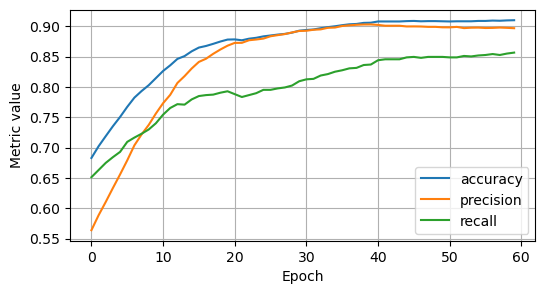

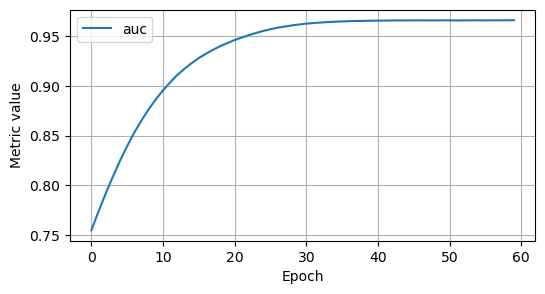

In [205]:
plot_experiment_metrics(experiment, ['accuracy', 'precision', 'recall'])
plot_experiment_metrics(experiment, ['auc'])

In [207]:
def evaluate_experiment(
        experiment: Experiment, test_dataset: pd.DataFrame, test_labels: np.array
) -> dict[str, float]:
    features = {
        feature_name: np.array(test_dataset[feature_name])
        for feature_name in experiment.settings.input_features
    }
    return experiment.model.evaluate(
        x=features,
        y=test_labels,
        batch_size=settings.batch_size,
        verbose=0,
        return_dict=True,
    )


def compare_train_test(experiment: Experiment, test_metrics: dict[str, float]):
    print('Comparing metrics between train and test:')
    for metric, test_value in test_metrics.items():
        print('------')
        print(f'Train {metric}: {experiment.get_final_metric_value(metric):.4f}')
        print(f'Test {metric}:  {test_value:.4f}')

test_metrics = evaluate_experiment(experiment, test_features, test_labels)
compare_train_test(experiment, test_metrics)

Comparing metrics between train and test:
------
Train loss: 0.2495
Test loss:  0.2199
------
Train accuracy: 0.9101
Test accuracy:  0.9274
------
Train precision: 0.8969
Test precision:  0.9530
------
Train recall: 0.8567
Test recall:  0.8554
------
Train auc: 0.9659
Test auc:  0.9774


In [209]:
all_input_features = [
    'no_of_dependents',
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value',
    'education',
    'self_employed',
]

In [211]:
settings_all_features = ExperimentSettings(
    learning_rate=0.001,
    number_epochs=60,
    batch_size=100,
    classification_threshold=0.5,
    input_features=all_input_features,
)

metrics = [
    keras.metrics.BinaryAccuracy(
        name='accuracy',
        threshold=settings_all_features.classification_threshold,
    ),
    keras.metrics.Precision(
        name='precision',
        thresholds=settings_all_features.classification_threshold,
    ),
    keras.metrics.Recall(
        name='recall', thresholds=settings_all_features.classification_threshold
    ),
    keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
model_all_features = create_model(settings_all_features, metrics)

# Train the model on the training set.
experiment_all_features = train_model(
    'all features',
    model_all_features,
    train_features,
    train_labels,
    settings_all_features,
)

Epoch 1/60
35/35 [==============================] - 4s 3ms/step - loss: 0.7716 - accuracy: 0.5663 - precision: 0.4382 - recall: 0.5890 - auc: 0.5951
Epoch 2/60
35/35 [==============================] - 0s 5ms/step - loss: 0.7300 - accuracy: 0.5792 - precision: 0.4498 - recall: 0.5890 - auc: 0.6174
Epoch 3/60
35/35 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.6012 - precision: 0.4711 - recall: 0.5906 - auc: 0.6398
Epoch 4/60
35/35 [==============================] - 0s 4ms/step - loss: 0.6651 - accuracy: 0.6228 - precision: 0.4941 - recall: 0.5929 - auc: 0.6633
Epoch 5/60
35/35 [==============================] - 0s 5ms/step - loss: 0.6387 - accuracy: 0.6474 - precision: 0.5230 - recall: 0.5898 - auc: 0.6871
Epoch 6/60
35/35 [==============================] - 0s 5ms/step - loss: 0.6157 - accuracy: 0.6679 - precision: 0.5500 - recall: 0.5890 - auc: 0.7108
Epoch 7/60
35/35 [==============================] - 0s 5ms/step - loss: 0.5952 - accuracy: 0.6878 - precis

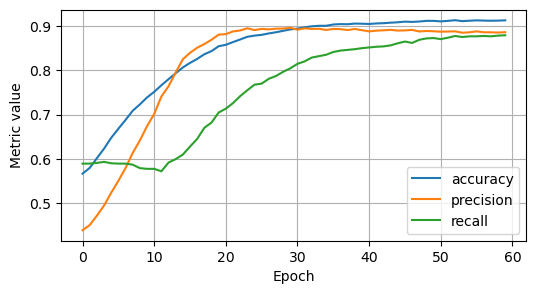

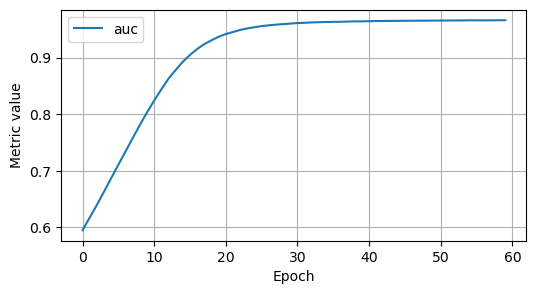

In [213]:
plot_experiment_metrics(
    experiment_all_features, ['accuracy', 'precision', 'recall']
)
plot_experiment_metrics(experiment_all_features, ['auc'])

In [215]:
def evaluate_experiment(
        experiment: Experiment, test_dataset: pd.DataFrame, test_labels: np.array
) -> dict[str, float]:
    features = {
        feature_name: np.array(test_dataset[feature_name])
        for feature_name in experiment.settings.input_features
    }
    return experiment.model.evaluate(
        x=features,
        y=test_labels,
        batch_size=settings.batch_size,
        verbose=0,
        return_dict=True,
    )


def compare_train_test(experiment: Experiment, test_metrics: dict[str, float]):
    print('Comparing metrics between train and test:')
    for metric, test_value in test_metrics.items():
        print('------')
        print(f'Train {metric}: {experiment.get_final_metric_value(metric):.4f}')
        print(f'Test {metric}:  {test_value:.4f}')

test_metrics = evaluate_experiment(experiment, test_features, test_labels)
compare_train_test(experiment, test_metrics)

Comparing metrics between train and test:
------
Train loss: 0.2495
Test loss:  0.2199
------
Train accuracy: 0.9101
Test accuracy:  0.9274
------
Train precision: 0.8969
Test precision:  0.9530
------
Train recall: 0.8567
Test recall:  0.8554
------
Train auc: 0.9659
Test auc:  0.9774
